Use either `nlp` or `bertopic` virtualenv
```
$ cd ~/projects/NLP
$ source bertopic/bin/activate
```

In [34]:
from IPython.display import display, HTML
# chart = HTML('<h1>Hello, world!</h1>')
# # or chart = charts.plot(...)
# display(chart)

In [2]:
from textnets import Corpus, Textnet

In [3]:
from textnets import examples

In [5]:
type(examples.moon_landing)

pandas.core.series.Series

In [4]:
examples.moon_landing

The Guardian                         3:56 am: Man Steps On to the Moon
New York Times       Men Walk on Moon -- Astronauts Land on Plain, ...
Boston Globe                                         Man Walks on Moon
Houston Chronicle    Armstrong and Aldrich "Take One Small Step for...
Washington Post       The Eagle Has Landed -- Two Men Walk on the Moon
Chicago Tribune      Giant Leap for Mankind -- Armstrong Takes 1st ...
Los Angeles Times    Walk on Moon -- That's One Small Step for Man,...
Name: headlines, dtype: object

In [7]:
corpus = Corpus(examples.moon_landing, lang="en_core_web_md")

In [8]:
corpus

In [37]:
display(HTML(corpus._repr_html_()))

In [20]:
corpus.tokenized(remove=["3:56", "eagle"], lower=False).head(10)

,term,n
label,,
Boston Globe,Man,1
Boston Globe,Moon,1
Boston Globe,Walks,1
Chicago Tribune,Armstrong,1
Chicago Tribune,Giant,1
Chicago Tribune,Leap,1
Chicago Tribune,Mankind,1
Chicago Tribune,Moon,1
Chicago Tribune,step,1


In [31]:
corpus.noun_phrases()

,term,n
label,,
Boston Globe,man walks,1
Boston Globe,moon,1
Chicago Tribune,1st step,1
Chicago Tribune,armstrong,1
Chicago Tribune,mankind,1
Chicago Tribune,moon,1
Houston Chronicle,aldrich,1
Houston Chronicle,armstrong,1
Houston Chronicle,man,1


In [27]:
corpus2 = corpus.tokenized(remove=["3:56", "eagle"])

In [32]:
corpus2

,term,n,tf
label,,,
Boston Globe,man,1,1.0
Boston Globe,moon,1,1.0
Boston Globe,walks,1,1.0
Chicago Tribune,armstrong,1,1.0
Chicago Tribune,giant,1,1.0
Chicago Tribune,leap,1,1.0
Chicago Tribune,mankind,1,1.0
Chicago Tribune,moon,1,1.0
Chicago Tribune,step,1,1.0


In [28]:
tn = Textnet(corpus2, min_docs=1)

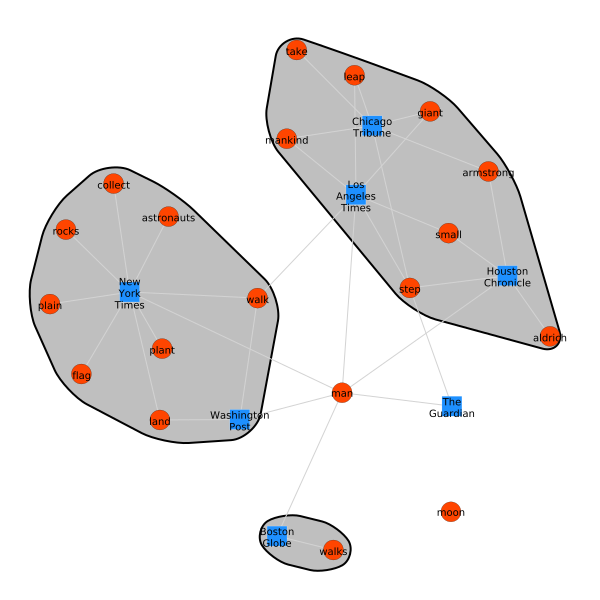

In [29]:
tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        show_clusters=True)

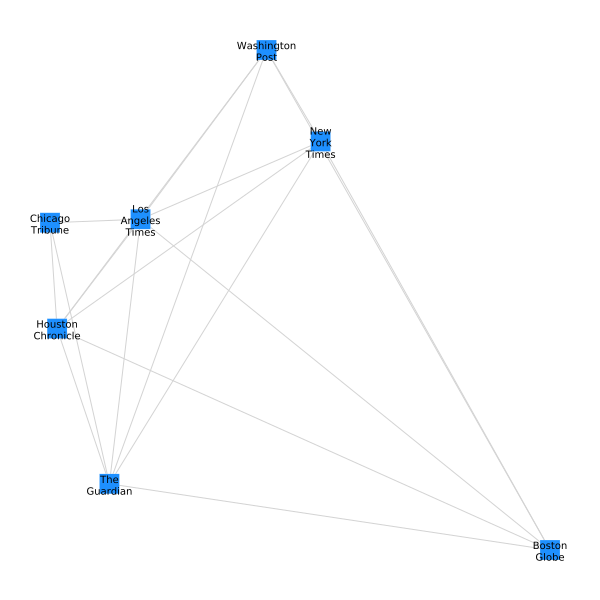

In [15]:
papers = tn.project(node_type='doc')
papers.plot(label_nodes=True)

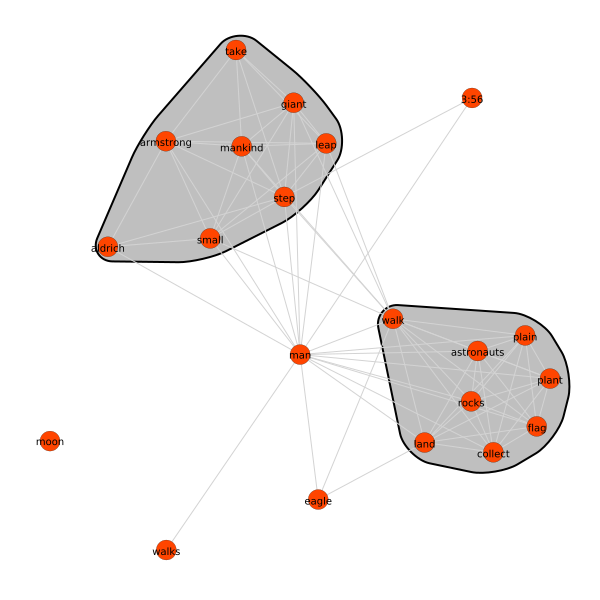

In [16]:
words = tn.project(node_type='term')
words.plot(label_nodes=True,
           show_clusters=True)

In [17]:
papers.top_betweenness()

Los Angeles Times    7.0
Boston Globe         0.0
Chicago Tribune      0.0
Houston Chronicle    0.0
New York Times       0.0
The Guardian         0.0
Washington Post      0.0
dtype: float64

In [18]:
words.top_betweenness()

walk         72.00
man          18.00
step         16.00
small        12.75
land          6.00
giant         6.00
leap          6.00
mankind       6.00
armstrong     3.25
plain         0.00
dtype: float64

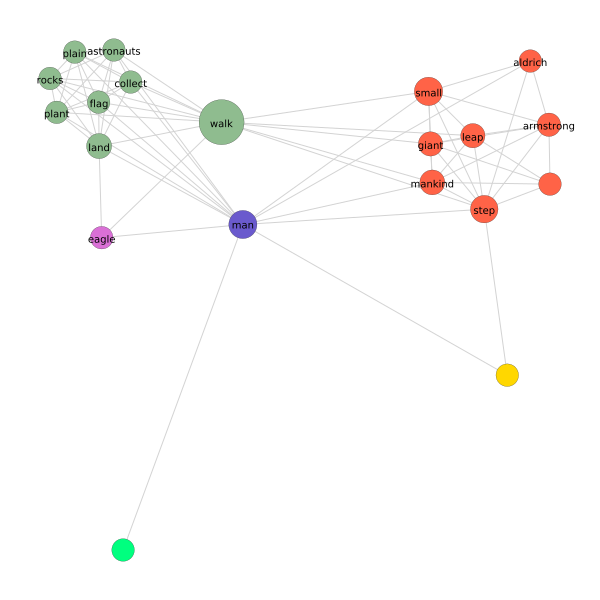

In [19]:
words.plot(label_nodes=True,
           scale_nodes_by='betweenness',
           color_clusters=True,
           alpha=0.5,
           node_label_filter=lambda n: n.betweenness() > words.betweenness.median())